Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

## Support Vector Regression using synthetic data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

Create a nonlinear function

In [2]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [3]:
n_samples = 1000
n_features = 6

In [4]:
x = 6 * np.random.rand(n_samples,n_features)

In [5]:
y = nonlinear(x) + np.random.randn(n_samples)

In [6]:
y = y.reshape(n_samples,1)

In [7]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe
df_x = pd.DataFrame(x, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6'])
df_y = pd.DataFrame(y, columns=['y'])
df_synthetic = pd.concat([df_x, df_y], axis=1)
df_synthetic.head()

,f1,f2,f3,f4,f5,f6,y
0,5.290184,5.662526,4.629457,0.663199,5.262051,5.121806,6.680147
1,2.020618,5.988559,2.213263,3.655633,3.844849,1.259885,-0.730368
2,4.746465,4.316370,5.569745,4.829202,1.147218,2.297779,-0.529060
3,1.458137,3.458033,2.242438,2.871755,3.083276,4.831935,0.943678
4,4.914845,4.558963,1.942450,2.897779,5.588638,0.234788,4.292672


Plot the data - Uncomment the following cell

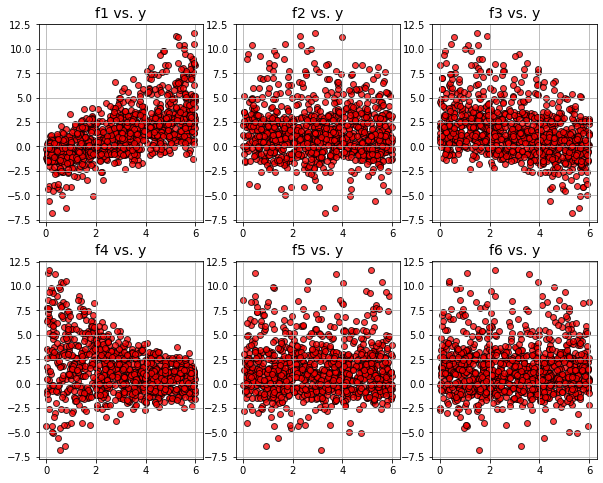

In [8]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
   ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['y'],edgecolor='k',color='red',alpha=0.75)
   ax[i].set_title(f"{df_synthetic.columns[i]} vs. y",fontsize=14)
   ax[i].grid(True)
plt.show()

In [9]:
# Add code below
# Perform test train split of the dataframe 'df_synthetic'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_synthetic.iloc[:, :-1], df_synthetic.iloc[:, -1], train_size=0.7)

Support vector regressor with linear kernel

In [10]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset
from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [11]:
# Add code below
# Display the R2 score

score = r2_score(y_test, y_pred)
print("R2 score of Linear SVR is :", score)

R2 score of Linear SVR is : 0.6149964405706624


In [12]:
# Add code below
# Build a linear regressor on the above dataset and report its R2 score
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
score1 = r2_score(y_test, y_pred1)
print("R2 score of Linear Regressor is :", score1)

R2 score of Linear Regressor is : 0.6185130166160611


## Support vector regressor with RBF kernel

In [13]:
#Add code below
# Use RBF kernel with default values and perform support vector regression
from sklearn.svm import SVR

model2 = SVR(kernel='rbf')
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [14]:
# Add code below
# Report R2 score of the above model
score2 = r2_score(y_test, y_pred2)
print("R2 score of Support Vector Regressor with RBF kenrel is :", score2)

R2 score of Support Vector Regressor with RBF kenrel is : 0.784864706948291


## Perform Grid Search CV

In [15]:
# Add code below
# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 10, 100], 'epsilon': [0.1, 0.01, 0.001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid)
grid.fit(x_train, y_train)
y_pred_grid = grid.predict(x_test)

In [16]:
# Add code below
# Check best model by the grid search and display it
print(grid.best_params_)

{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


In [17]:
# Add code below
# Fit that model to the data and check the R2 score
c = grid.best_params_['C']
eps = grid.best_params_['epsilon']
best_model = SVR(kernel='rbf', C=c, epsilon=eps)
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)  
best_score = r2_score(y_test, y_pred_best)
print("R2 score of Support Vector Regressor with RBF kenrel on best Parameters is :", best_score)

R2 score of Support Vector Regressor with RBF kenrel on best Parameters is : 0.7917073432228587
